In [20]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint

In [21]:
N = 5505
I0 = 45
R0 = 3
S0 = N - I0 - R0
a = .01
b = .02

In [22]:
t0 = 0
tmax = 200
dt = .01

t = np.arange(t0, tmax, dt)
t = np.append(t, tmax)
t

array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 1.9998e+02, 1.9999e+02,
       2.0000e+02])

# Для случая $I(0) \leq I^{0}$

In [23]:
def syst1(begin, t):
    S = begin[0]
    I = begin[1]
    R = begin[2]
    dSdt = 0
    dIdt = -b * I
    dRdt = b * I
    return (dSdt, dIdt, dRdt)

In [24]:
v0 = (S0, I0, R0)

In [25]:
yf = odeint(syst1, v0, t)
yf

array([[5.45700000e+03, 4.50000000e+01, 3.00000000e+00],
       [5.45700000e+03, 4.49910009e+01, 3.00899910e+00],
       [5.45700000e+03, 4.49820036e+01, 3.01799640e+00],
       ...,
       [5.45700000e+03, 8.24533496e-01, 4.71754665e+01],
       [5.45700000e+03, 8.24368606e-01, 4.71756314e+01],
       [5.45700000e+03, 8.24203748e-01, 4.71757963e+01]])

In [26]:
s = []
i = []
r = []

for j in range(len(yf)):
    s = np.append(s, yf[j][0])
    i = np.append(i, yf[j][1])
    r = np.append(r, yf[j][2])

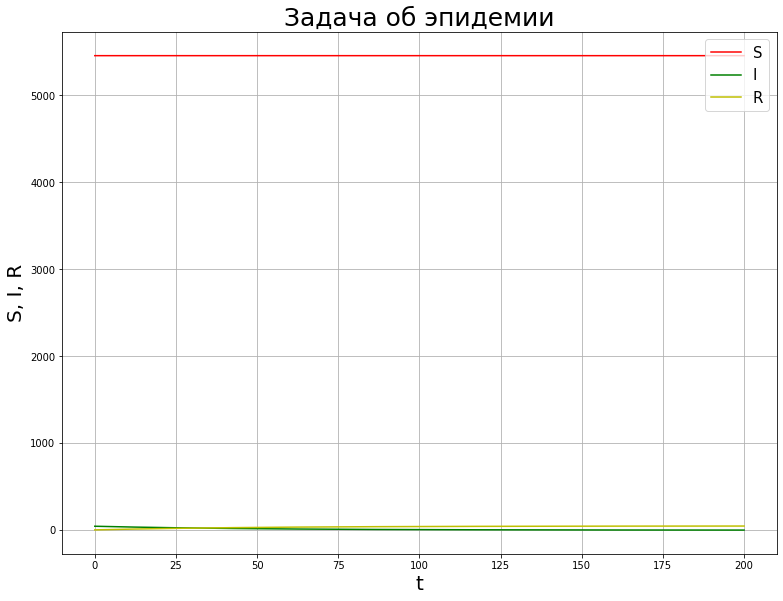

In [27]:
plt.figure(figsize=(12.8, 9.6))
plt.grid(True)
plt.title('Задача об эпидемии', fontsize=25)
plt.xlabel("t", fontsize=20)
plt.ylabel("S, I, R", fontsize=20)
plt.plot(t, s, 'r', label='S')
plt.plot(t, i, 'g', label='I')
plt.plot(t, r, 'y', label='R')
plt.legend(loc='upper right', fontsize=15)

# Для случая $I(0) > I^{0}$

In [28]:
def syst2(begin, t):
    S = begin[0]
    I = begin[1]
    R = begin[2]
    dSdt = -a * S
    dIdt = a*S - b*I
    dRdt = b * I
    return (dSdt, dIdt, dRdt)

In [29]:
v0 = (S0, I0, R0)

In [30]:
yf = odeint(syst2, v0, t)
yf

array([[5.45700000e+03, 4.50000000e+01, 3.00000000e+00],
       [5.45645433e+03, 4.55366191e+01, 3.00905366e+00],
       [5.45590871e+03, 4.60730762e+01, 3.01821463e+00],
       ...,
       [7.38672360e+02, 6.39508466e+02, 4.12681917e+03],
       [7.38598497e+02, 6.39454433e+02, 4.12694707e+03],
       [7.38524641e+02, 6.39400404e+02, 4.12707496e+03]])

In [31]:
s = []
i = []
r = []

for j in range(len(yf)):
    s = np.append(s, yf[j][0])
    i = np.append(i, yf[j][1])
    r = np.append(r, yf[j][2])

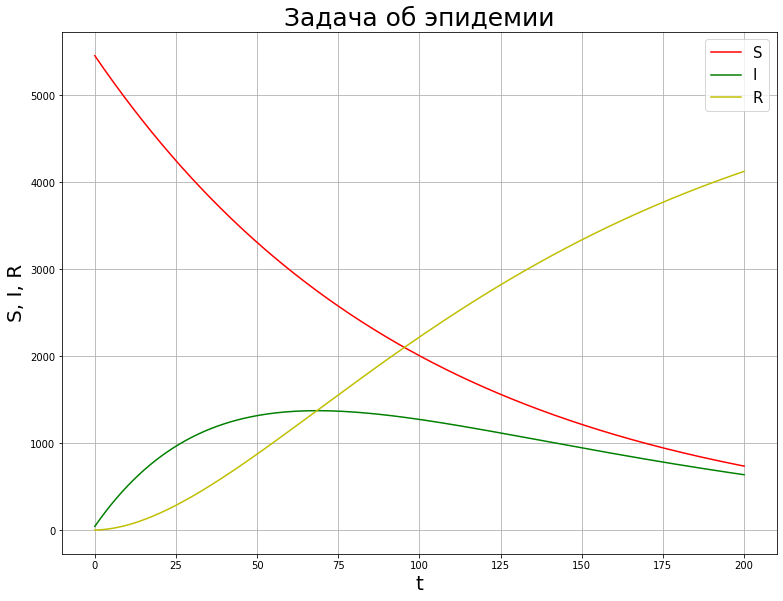

In [32]:
plt.figure(figsize=(12.8, 9.6))
plt.grid(True)
plt.title('Задача об эпидемии', fontsize=25)
plt.xlabel("t", fontsize=20)
plt.ylabel("S, I, R", fontsize=20)
plt.plot(t, s, 'r', label='S')
plt.plot(t, i, 'g', label='I')
plt.plot(t, r, 'y', label='R')
plt.legend(loc='upper right', fontsize=15)